In [1]:
"""
CSCD84 - Artificial Intelligence, Winter 2025, Assignment 3
B. Chan
"""


import _pickle as pickle
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

In [2]:
models_dir = "./logs/models"

## Plotting Training and Validation Performances

C:\Users\junoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)


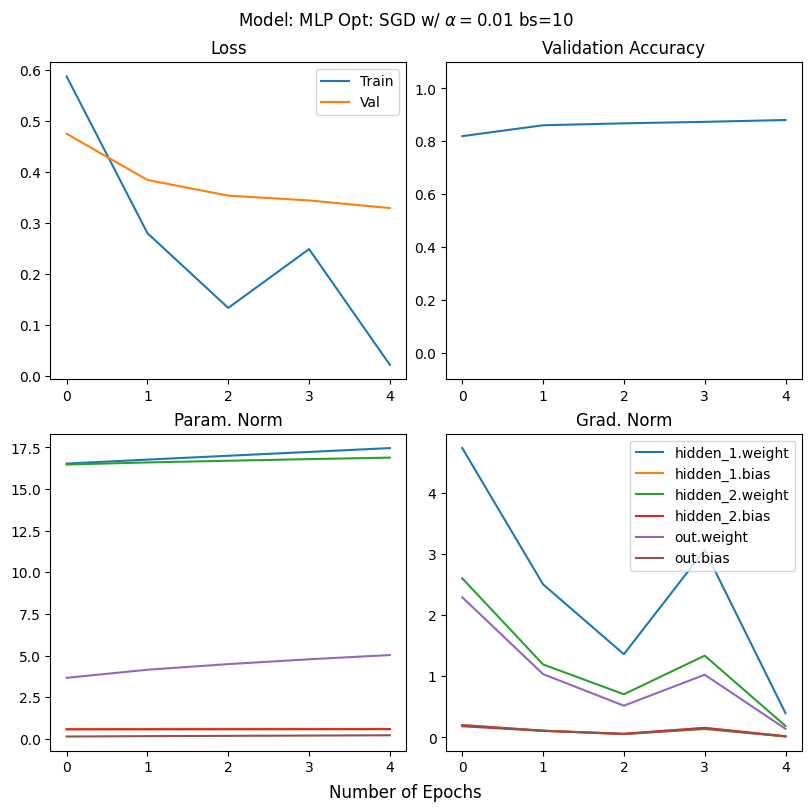

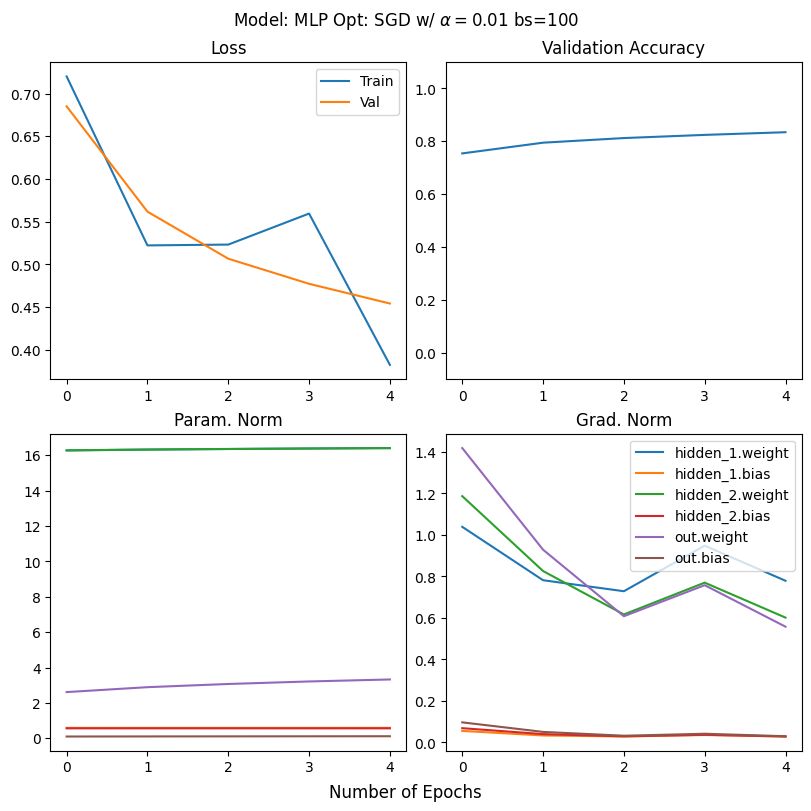

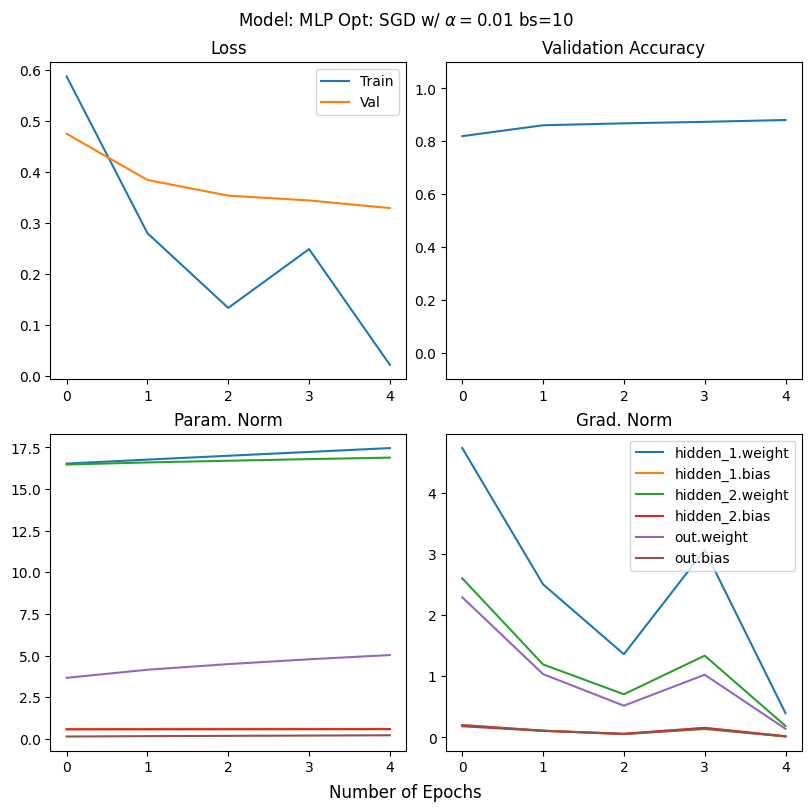

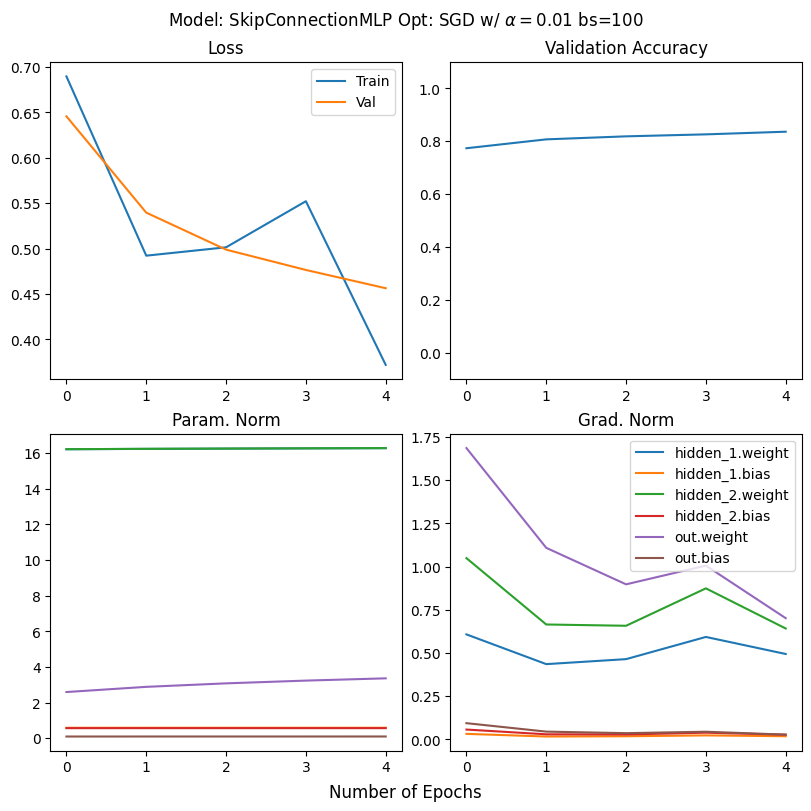

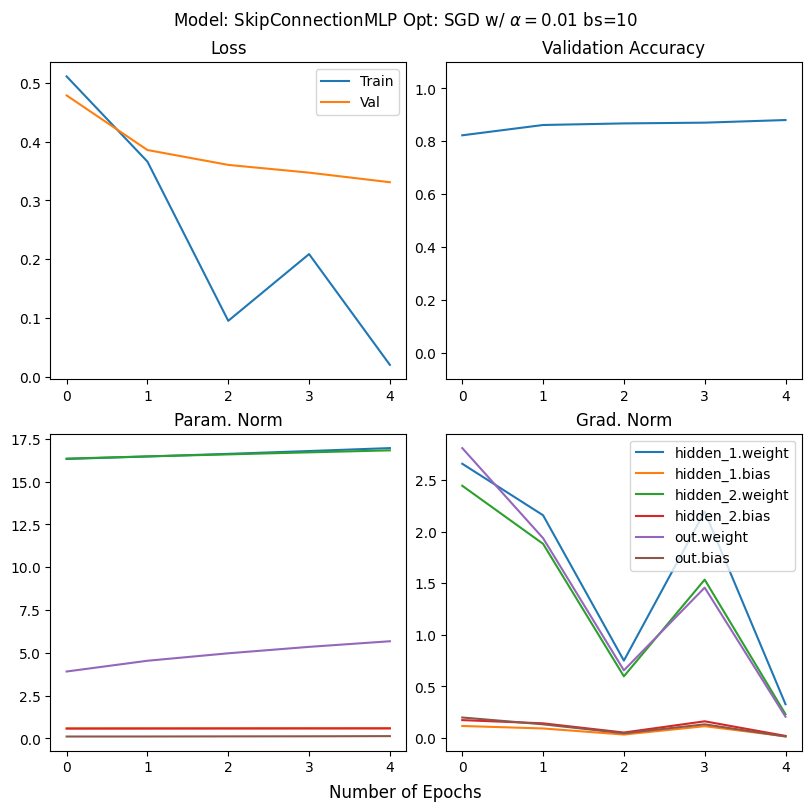

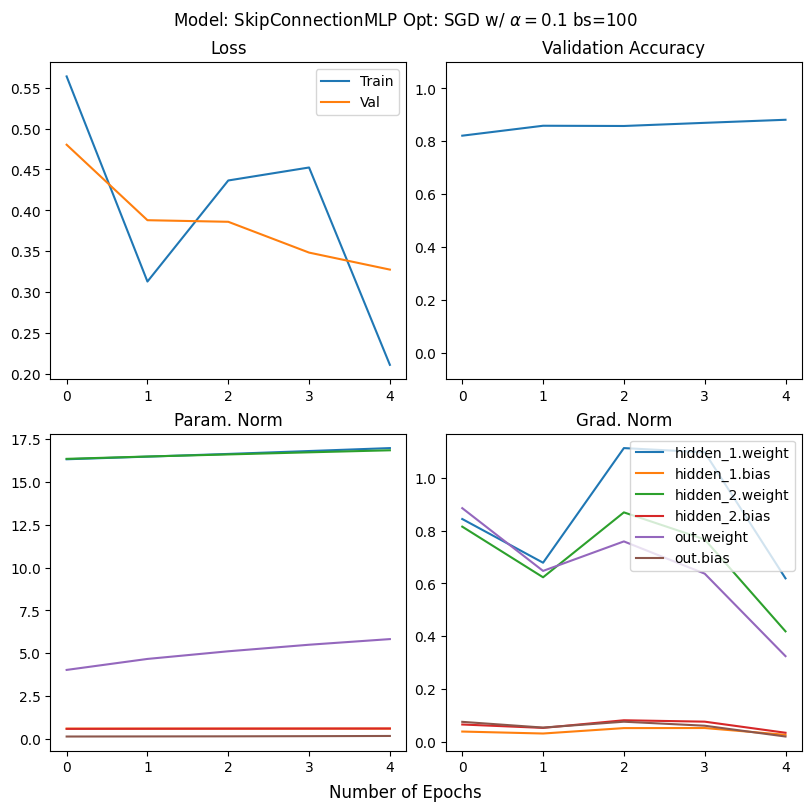

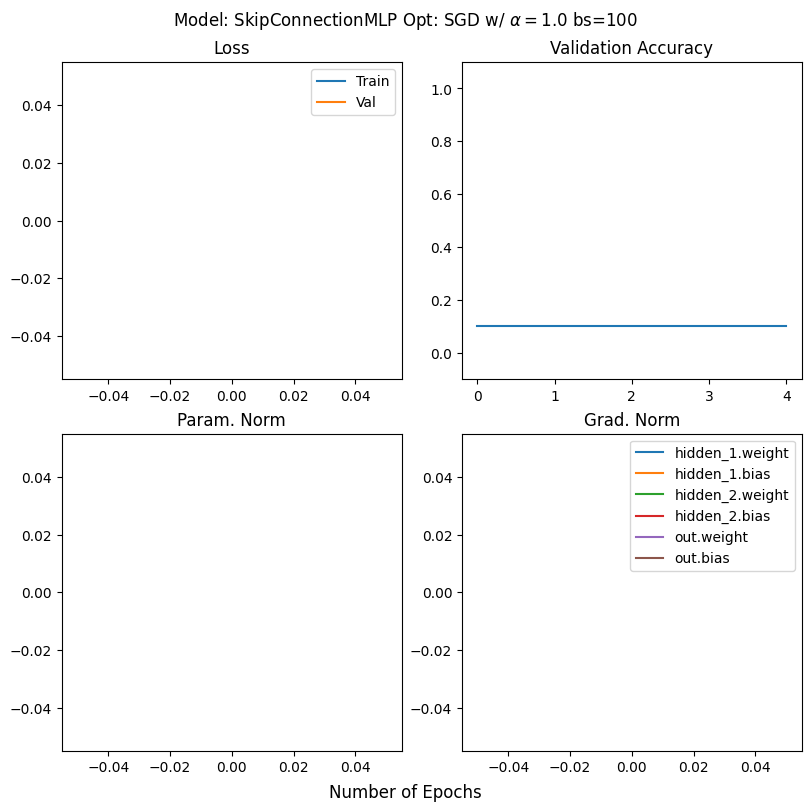

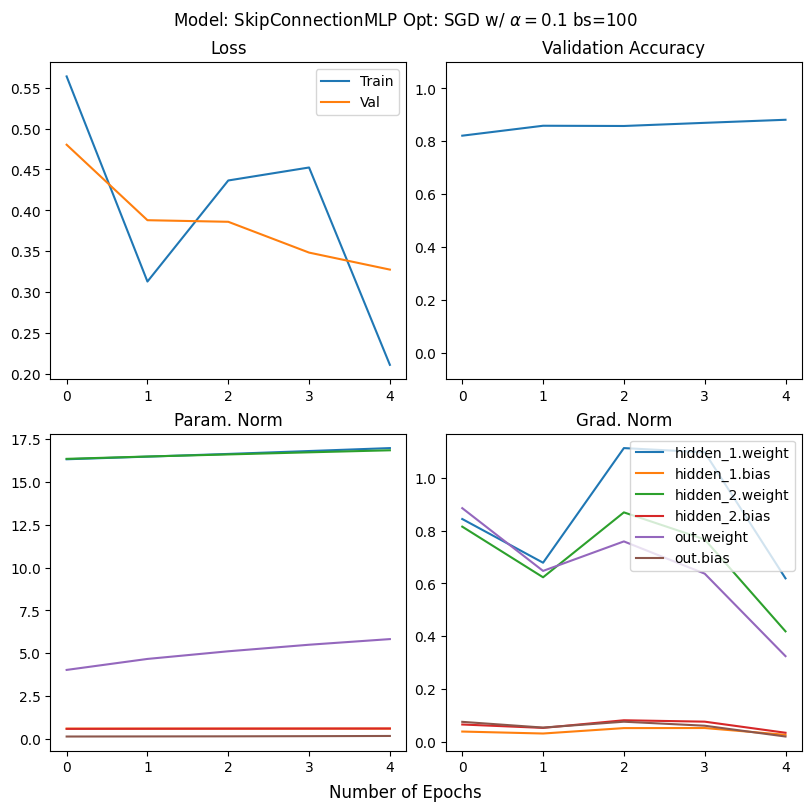

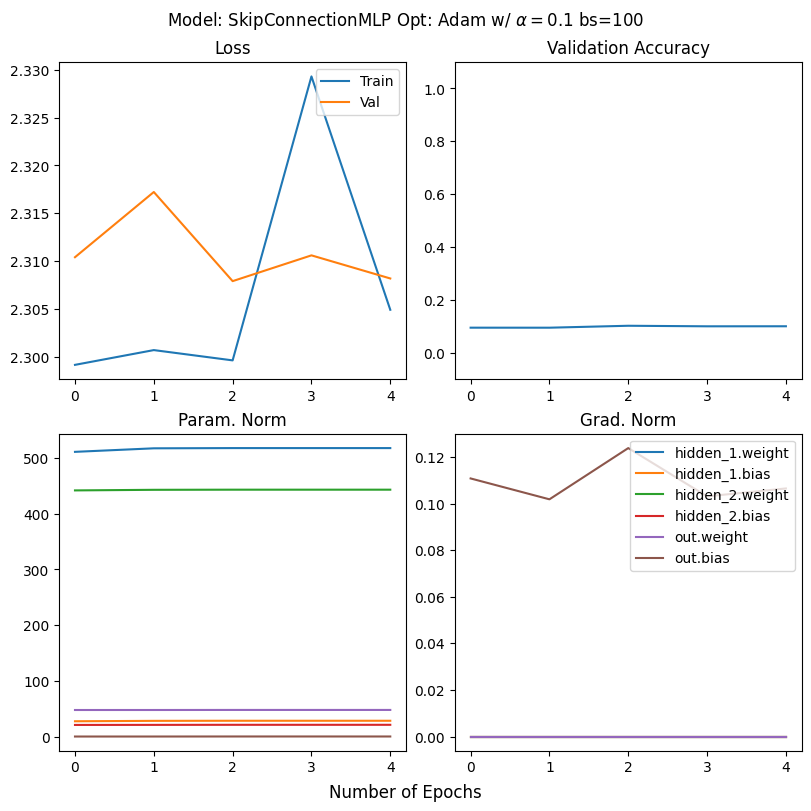

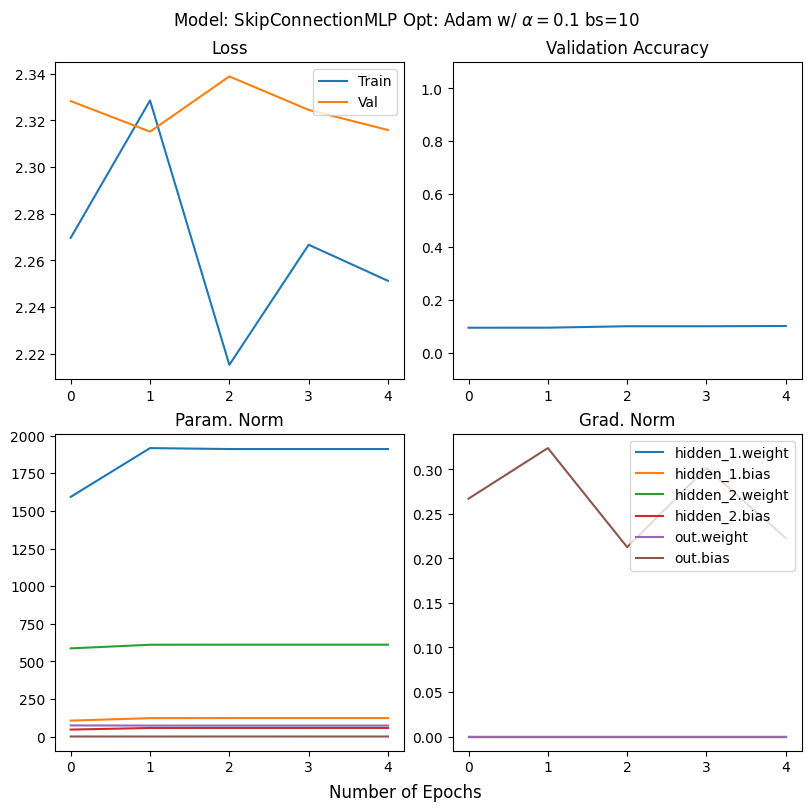

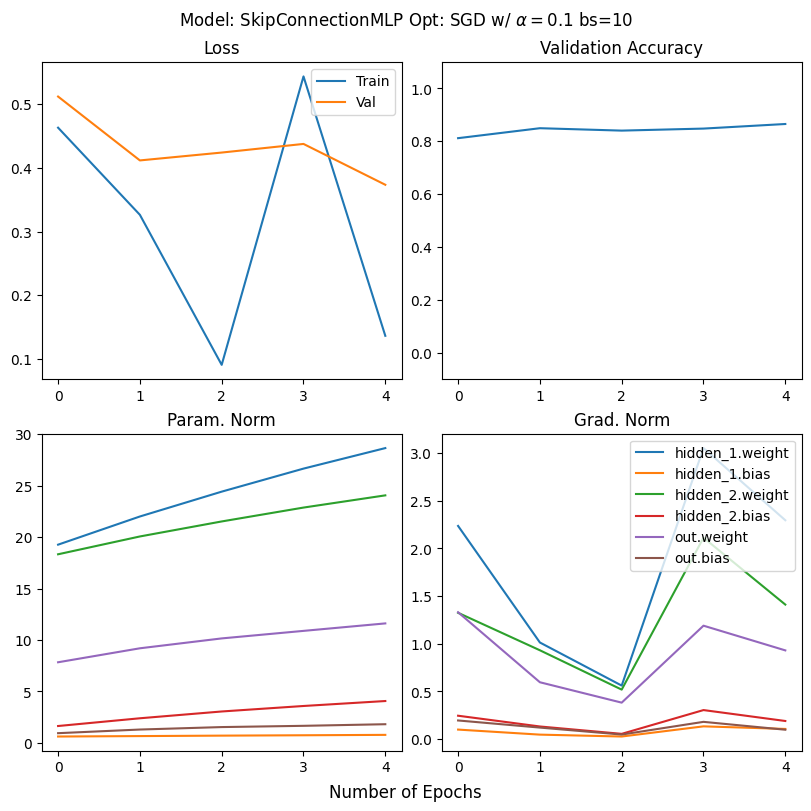

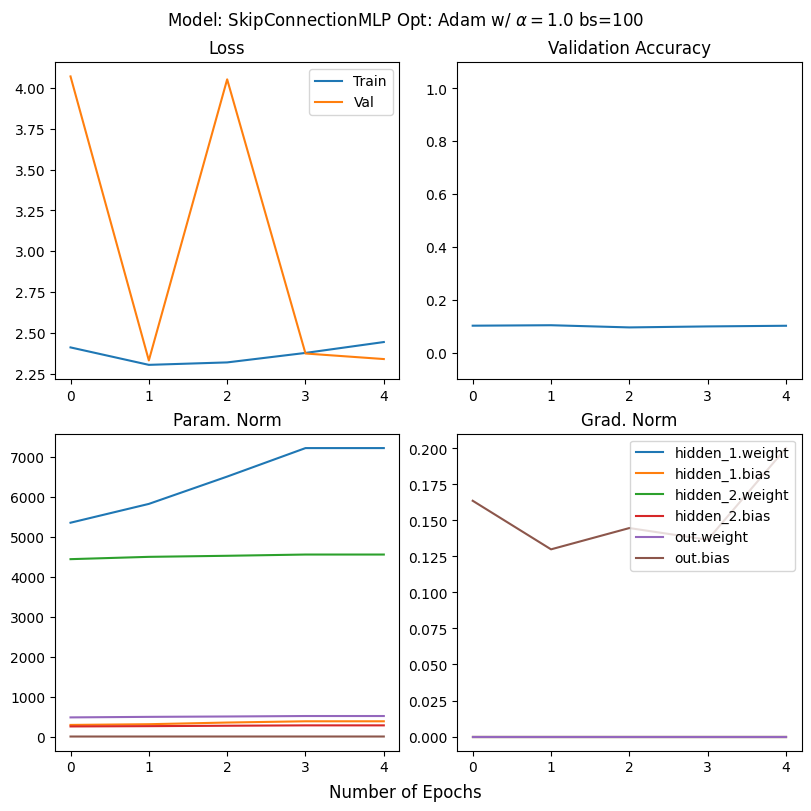

C:\Users\junoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


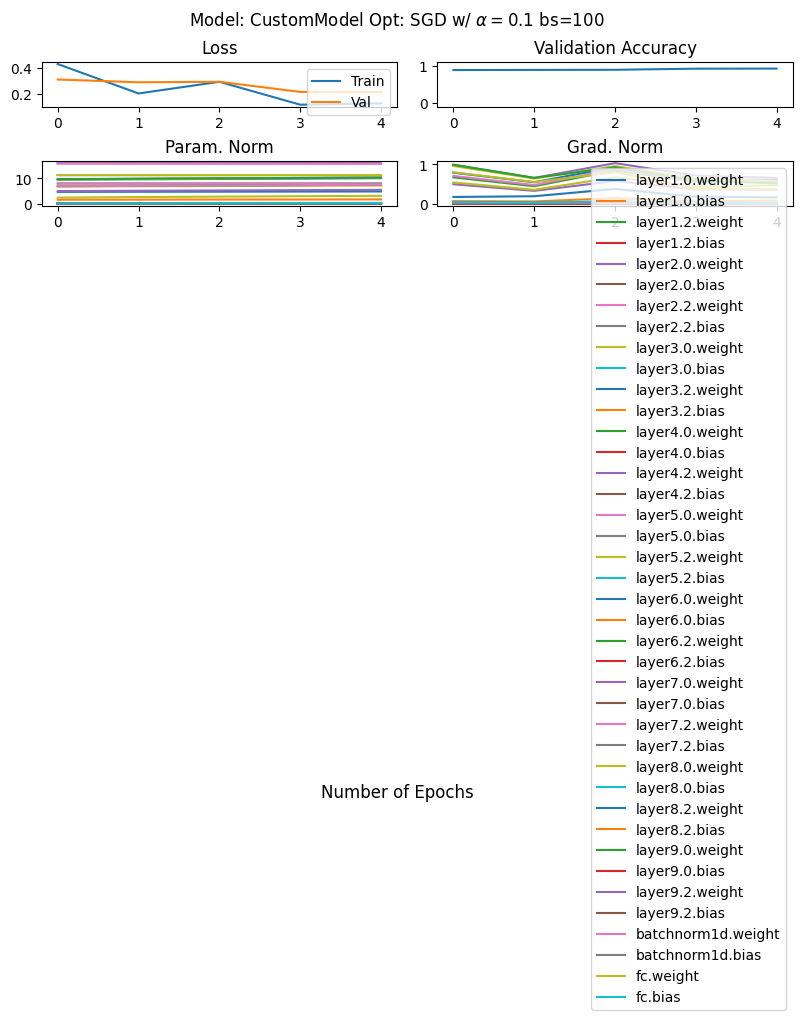

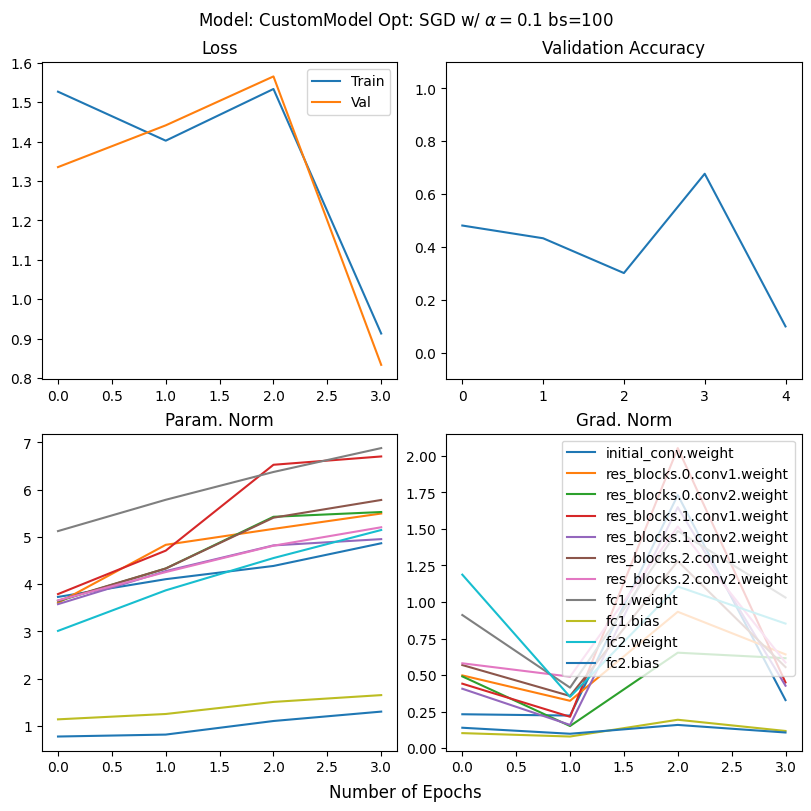

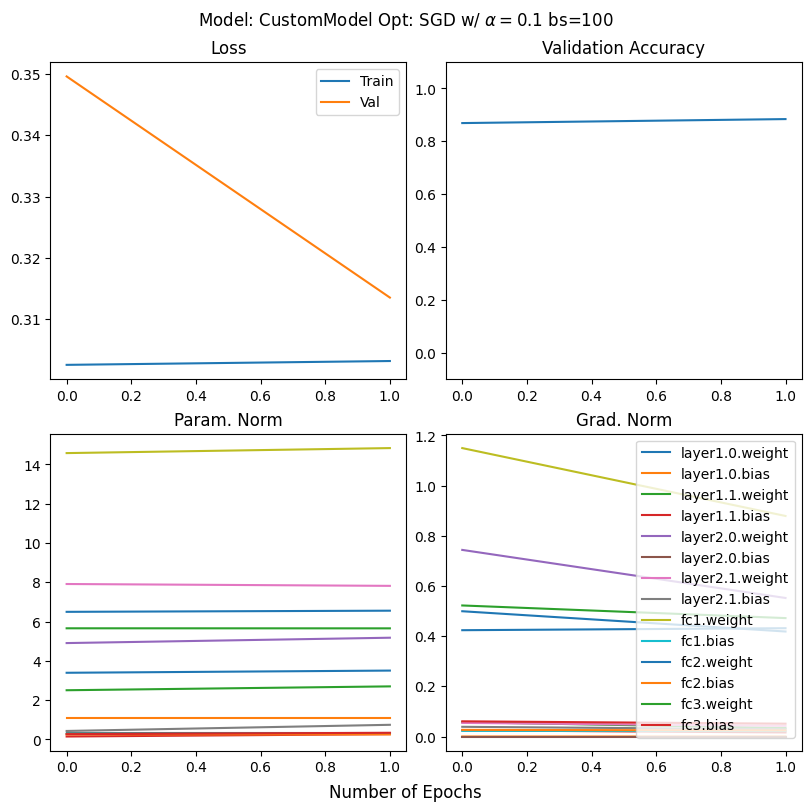

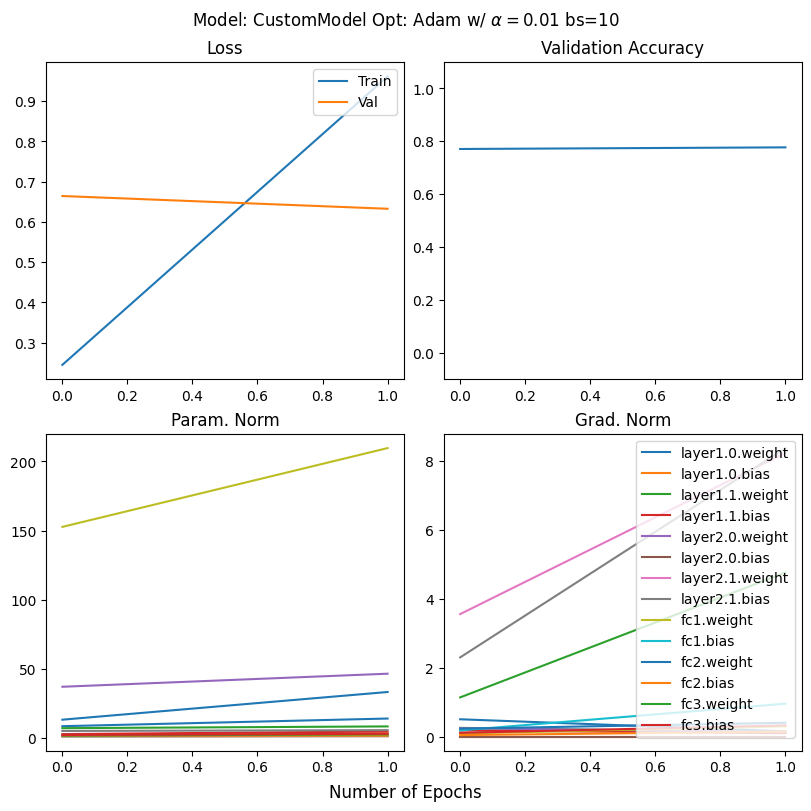

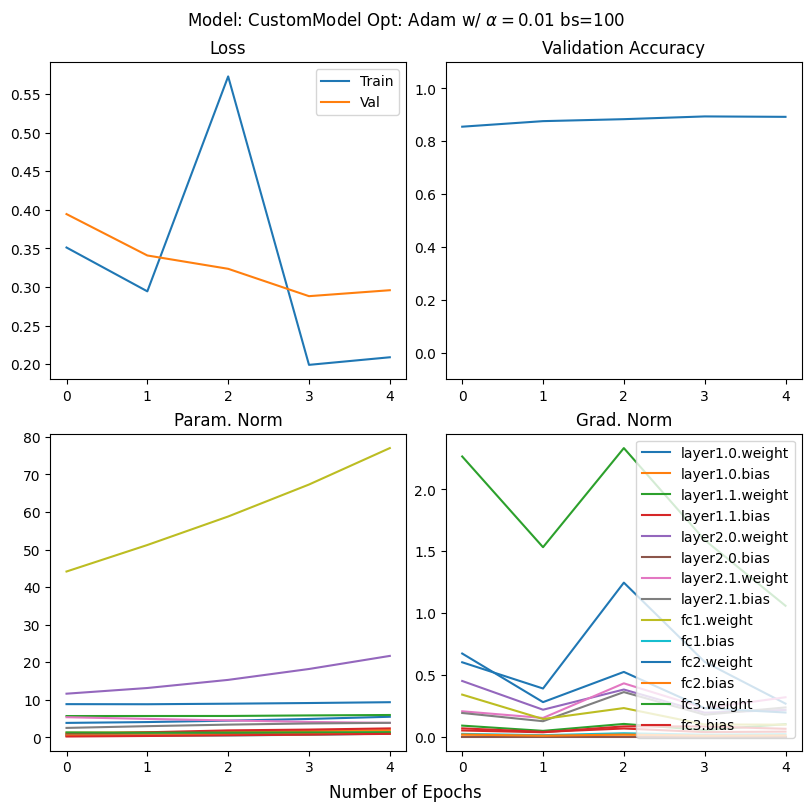

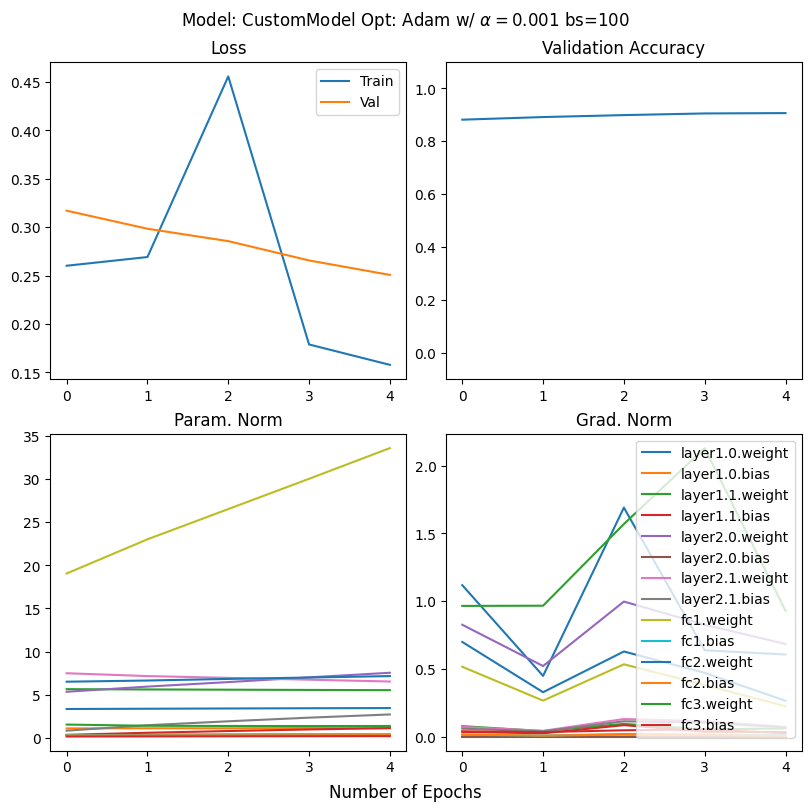

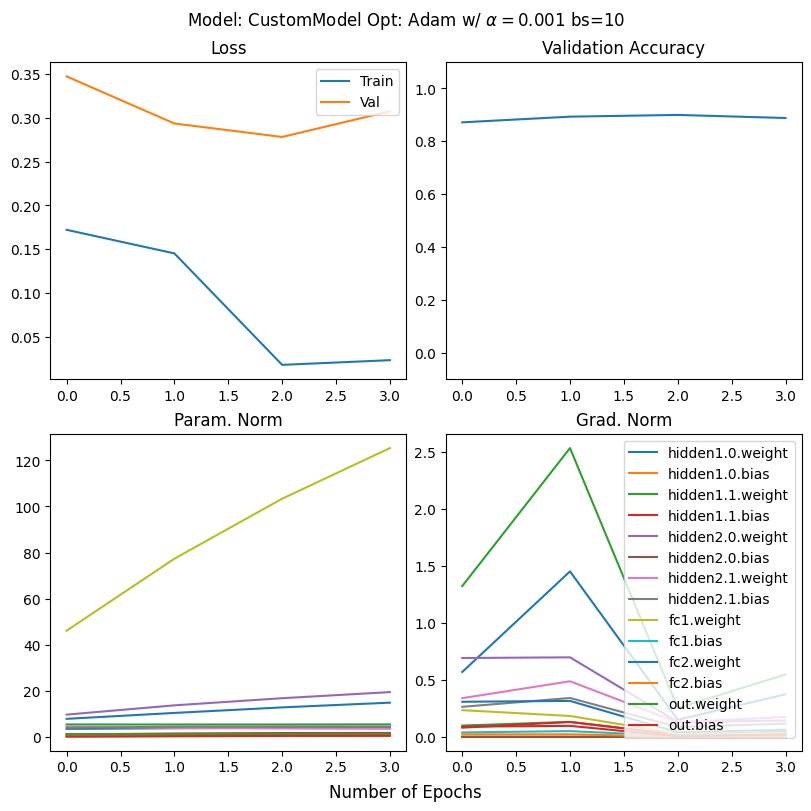

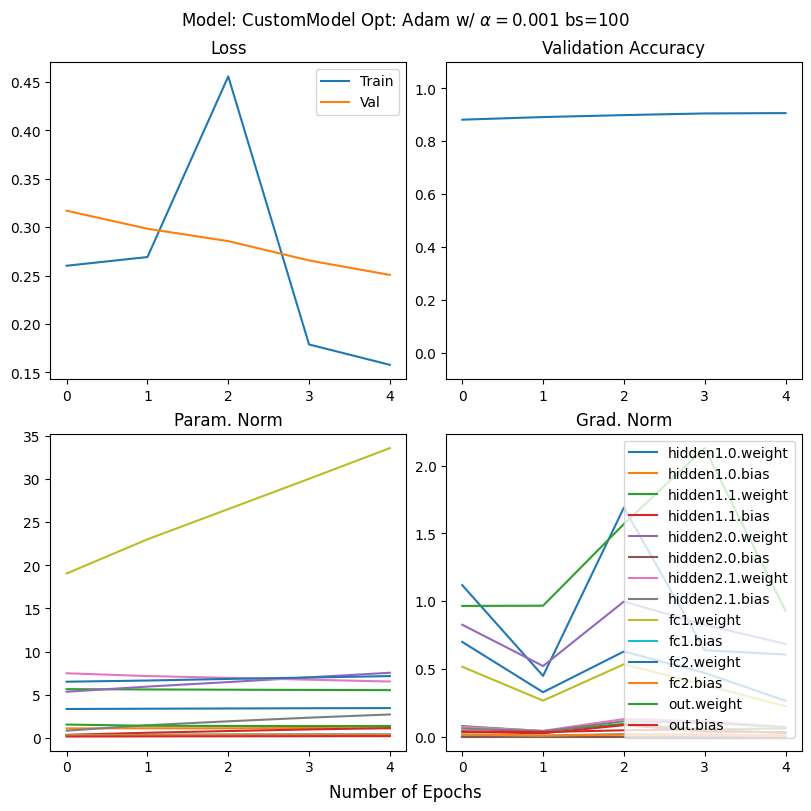

In [20]:
for model_dir in os.listdir(models_dir):

    config = json.load(open(os.path.join(models_dir, model_dir, "config.json")))
    logs = pickle.load(open(os.path.join(models_dir, model_dir, "logs.pkl"), "rb"))

    fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout="constrained")

    axes = axes.reshape(-1)
    axes[0].set_title("Loss")
    axes[0].plot(
        np.arange(len(logs["train"]["loss"])),
        logs["train"]["loss"],
        label="Train",
    )
    axes[0].plot(
        np.arange(len(logs["validation"]["loss"])),
        logs["validation"]["loss"],
        label="Val",
    )
    axes[0].legend(loc="upper right")

    axes[1].set_title("Validation Accuracy")
    axes[1].plot(
        np.arange(len(logs["validation"]["accuracy"])),
        logs["validation"]["accuracy"],
    )
    axes[1].set_ylim(-0.1, 1.1)

    axes[2].set_title("Param. Norm")
    for k, v in logs["train"].items():
        if not k.startswith("param_norm/"):
            continue

        axes[2].plot(
            np.arange(len(v)),
            v,
            label=k.split("/")[-1],
        )

    axes[3].set_title("Grad. Norm")

    for k, v in logs["train"].items():
        if not k.startswith("grad_norm/"):
            continue

        axes[3].plot(
            np.arange(len(v)),
            v,
            label=k.split("/")[-1],
        )
    axes[3].legend(loc="upper right")

    fig.supxlabel("Number of Epochs")

    fig.suptitle("Model: {} Opt: {} w/ $\\alpha=${} bs={}".format(
        config["model"],
        config["optimizer"],
        config["learning_rate"],
        config["batch_size"],
    ))

    plt.plot()

## Visualizing the features generated by the MLP

C:\Users\junoz\AppData\Local\Temp\ipykernel_14920\2079547361.py:26: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


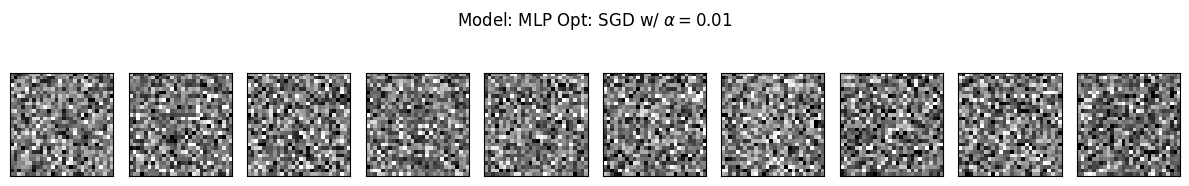

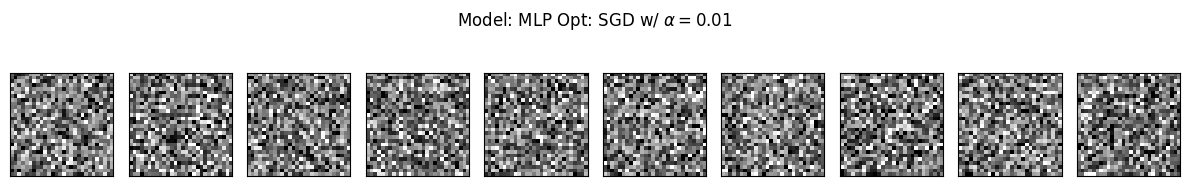

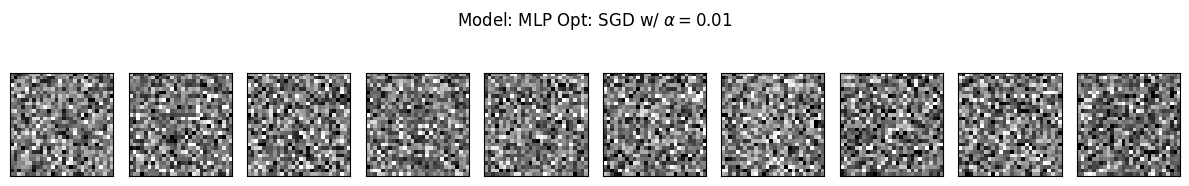

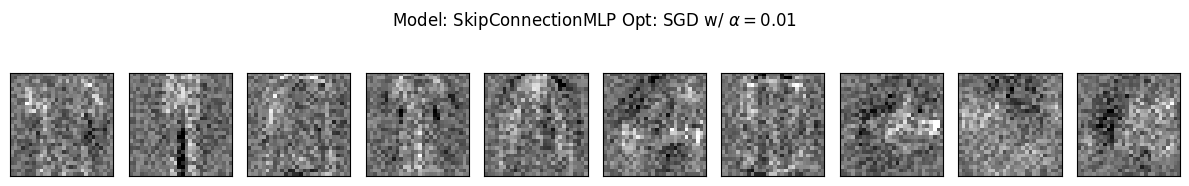

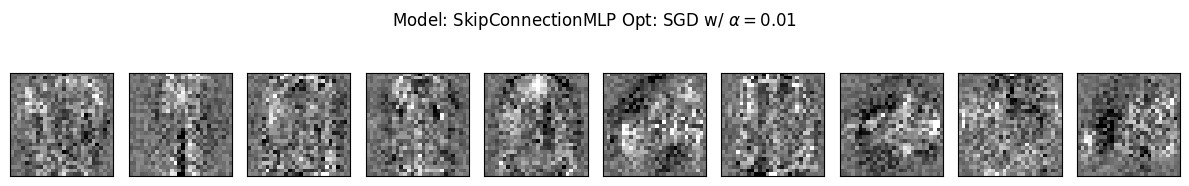

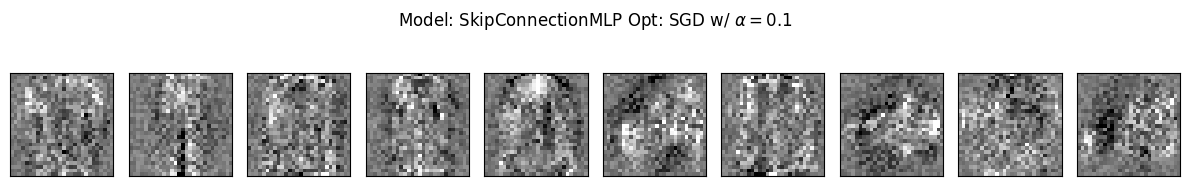

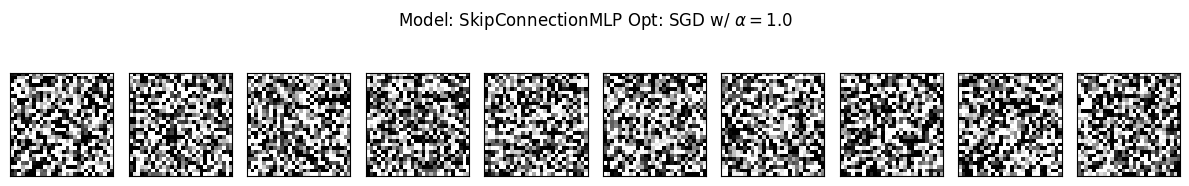

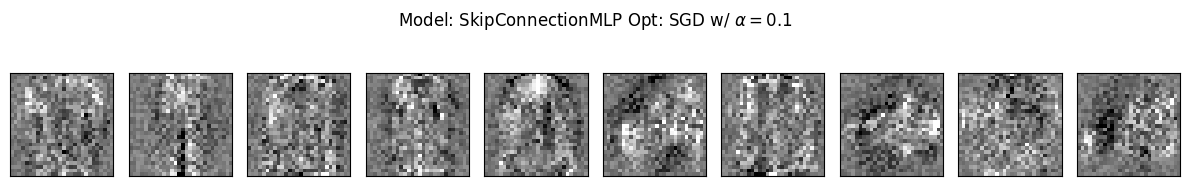

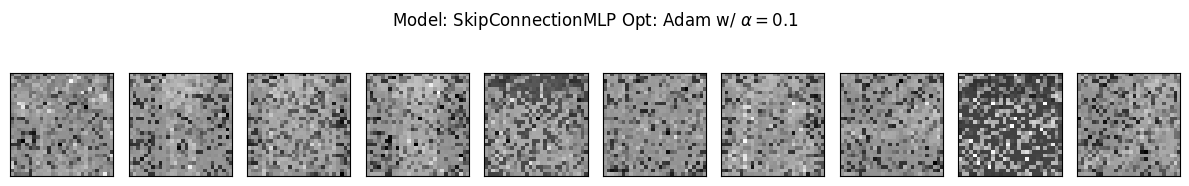

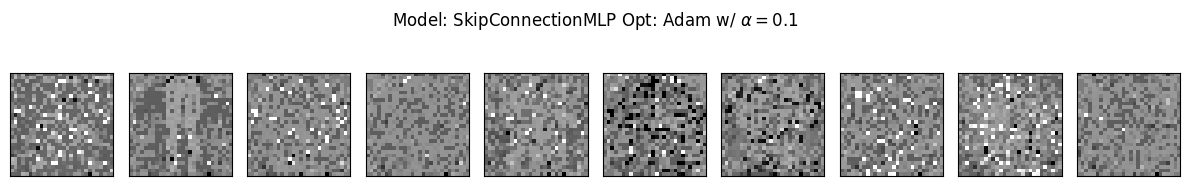

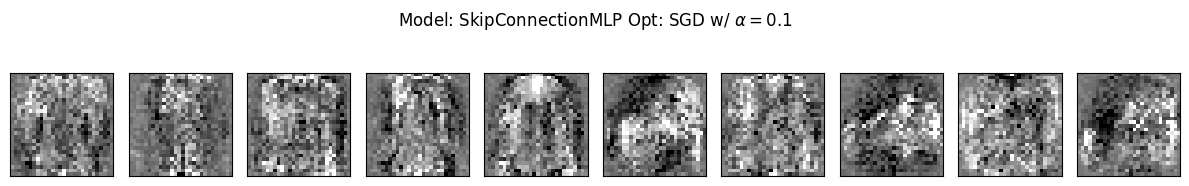

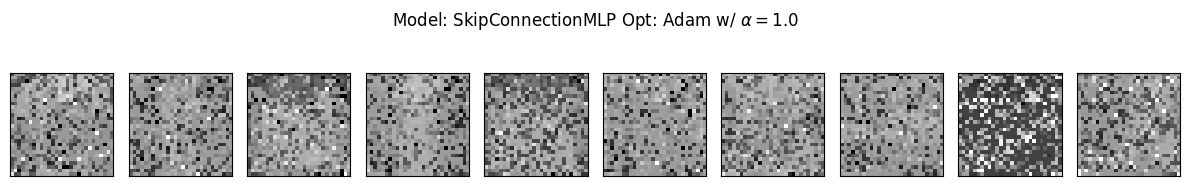

In [16]:
for model_dir in os.listdir(models_dir):

    config = json.load(
        open(os.path.join(models_dir, model_dir, "config.json"))
    )
    params = torch.load(
        os.path.join(models_dir, model_dir, "best.pt"),
        weights_only=True
    )["model_state_dict"]

    # use global min / max to ensure all weights are shown on the same scale
    if config["model"] in ["MLP", "SkipConnectionMLP"]:
        fig, axes = plt.subplots(1, 10, figsize=(12, 2), layout="constrained")

        fig.suptitle("Model: {} Opt: {} w/ $\\alpha=${}".format(
            config["model"],
            config["optimizer"],
            config["learning_rate"],
        ))
        vmin, vmax = params["out.weight"].min(), params["out.weight"].max()
        for coef, ax in zip(params["out.weight"], axes.ravel()):
            ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
            ax.set_xticks(())
            ax.set_yticks(())

        fig.tight_layout()
        plt.show()
    else:
        print("This visualization is designed for MLPs---your CustomModel cannot be visualized here")

## Hyperparameter Selection
What hyperparameters do you think is the best based on the above runs?
Explain.

Answer: We used the following parameters

**num_epochs: 5**

**batch_size: 10**

**model: SkipConnectionMLP**

**optimizer: SGD**

**learning_rate: 0.1**

After running both 1000, and 5-10 epochs, We found that after a certain point, more epochs started contributing less and less to improving the accuracy of the model. Our cut-off was at 5.

We similarly tested running the model with many different batch sizes, and found that smaller batch sizes improves the accuracy of the model, so we went with a batch size of 10 for the SGD. Though to speed up testing, other parameters were tested with a batch size of 100, and the changes in accuracies were compared relatively. 

Comparing the MLP and SkipConnectionMLP in model 3 and 4, there was a clear difference in feature extraction, as can be seen by the examples rendered above, so we went with the SkipConnectionMLP. Similarly for the optimizers, noticeable differences in feature extraction could be seen between SGD and Adam.

We tested and found that a learning_rate of 1 caused problems (most likely making the error function "bounce" out of the minimum hole). There was no immediate differences between 0.1 and 0.01, and so we went with 0.1

## Evaluation
Given that you have selected the best model, run evaluation on this model and submit the metrics:

| Metric   | Score |
|----------|-------|
| Loss     |  **.3880**  |
| Accuracy |  **.8638**  |



## Custom Model Evaluation
Implement your own deep-learning model and try to get good results!
You should follow the previous steps (i.e. select best hyperparameter setting the same way as above) and finally evaluate the best model.
What evaluation performance does your best effort achieve?

| Metric   | Score |
|----------|-------|
| Loss     |  **.2507**  |
| Accuracy |  **.9068**  |